In [52]:
import os
import sys
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

current_dir = os.getcwd()
print(current_dir)

parent_dir = os.path.dirname(current_dir)
print(parent_dir)

sys.path.insert(0,parent_dir)


c:\Users\Temp\Desktop\KAI-Projects\user-satisfaction-analysis\notebooks
c:\Users\Temp\Desktop\KAI-Projects\user-satisfaction-analysis


In [3]:
from scripts.load_data import load_postgres_data
from scripts.feature_understanding import plot_bar, plot_kde, top_10_handset, top_manufacturer


postgres telecom_data


In [4]:
query = "SELECT * FROM xdr_data;"
df = load_postgres_data(query)

c:\Users\Temp\Desktop\KAI-Projects\user-satisfaction-analysis\scripts\load_data.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


In [5]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
df.shape


(150001, 55)

In [7]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [8]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [9]:
#checking how many of the colomn have misssing values
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [10]:
#check how many rows are duplicated    : No row is duplicated
df.loc[df.duplicated()]

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)


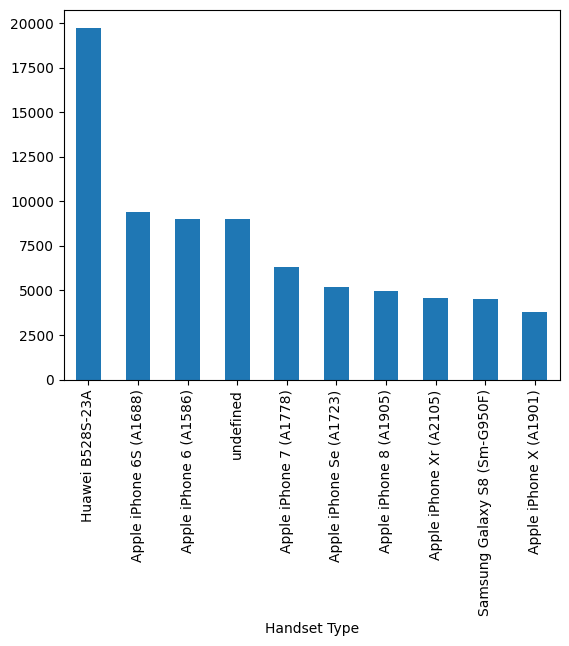

In [11]:
#top 10
column = df['Handset Type']
bar = plot_bar(df, column, 10)

In [12]:
#the top 10 handset mobile devise
top_10_handset(df)


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

In [13]:
top_manufacturer(df)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

In [ ]:
top_3 = df['Handset Manufacturer'].value_counts().head(3)


Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

In [48]:
a = df.groupby('Handset Manufacturer')['Handset Type'].agg(['value_counts'])
a

value_counts
Handset Manufacturer                    Handset Type                                   
A-Link Telecom International Co Limited A-Link Telecom I. Cubot X18 Plus              2
                                        A-Link Telecom I. Cubot A5                    1
                                        A-Link Telecom I. Cubot Note Plus             1
                                        A-Link Telecom I. Cubot Note S                1
                                        A-Link Telecom I. Cubot Nova                  1
...                                                                                 ...
Zte                                     Zte Starxtrem By Sfr                          1
ZyXEL Communications Corp               Zyxel Communicat. Zyxel Wah7706               1
Zyxel Communications Corp               Zyxel Communicat. Lte7460                     1
                                        Zyxel Communicat. Sbg3600                     1
undefined                               undefined                                  8987

[1396 rows x 1 columns]

Top 5 Handset Tpes per top 3 Handset manufacturer

In [53]:
handset_counts = (
    df.groupby(['Handset Manufacturer', 'Handset Type'])
    .size()
    .reset_index(name='Count')
)

# Step 2: Identify the top 3 manufacturers based on total handset occurrences
top_manufacturers = (
    handset_counts.groupby('Handset Manufacturer')['Count']
    .sum()
    .nlargest(3)
    .index
)

# Step 3: Filter the dataset for the top 3 manufacturers
filtered_handset_counts = handset_counts[handset_counts['Handset Manufacturer'].isin(top_manufacturers)]

# Step 4: Select the top 5 handsets per manufacturer
top_5_handsets_per_manufacturer = (
    filtered_handset_counts.groupby('Handset Manufacturer', group_keys=False)
    .apply(lambda group: group.nlargest(5, 'Count'))
)

# Display the result
print(top_5_handsets_per_manufacturer)

    Handset Manufacturer                    Handset Type  Count
60                 Apple         Apple iPhone 6S (A1688)   9419
56                 Apple          Apple iPhone 6 (A1586)   9023
66                 Apple          Apple iPhone 7 (A1778)   6326
80                 Apple         Apple iPhone Se (A1723)   5187
73                 Apple          Apple iPhone 8 (A1905)   4993
316               Huawei                Huawei B528S-23A  19752
337               Huawei                    Huawei E5180   2079
416               Huawei  Huawei P20 Lite Huawei Nova 3E   2021
415               Huawei                      Huawei P20   1480
457               Huawei                  Huawei Y6 2018    997
957              Samsung    Samsung Galaxy S8 (Sm-G950F)   4520
840              Samsung      Samsung Galaxy A5 Sm-A520F   3724
890              Samsung     Samsung Galaxy J5 (Sm-J530)   3696
882              Samsung     Samsung Galaxy J3 (Sm-J330)   3484
955              Samsung    Samsung Gala

C:\Users\Temp\AppData\Local\Temp\ipykernel_15592\1500250396.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.nlargest(5, 'Count'))
